Starting Comprehensive XAI Analysis for Crater Detection...
Performing GradCAM Analysis...

image 1/1 /teamspace/studios/this_studio/YOLO & SAM Analysis/testmer2.png: 640x640 41 craters, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


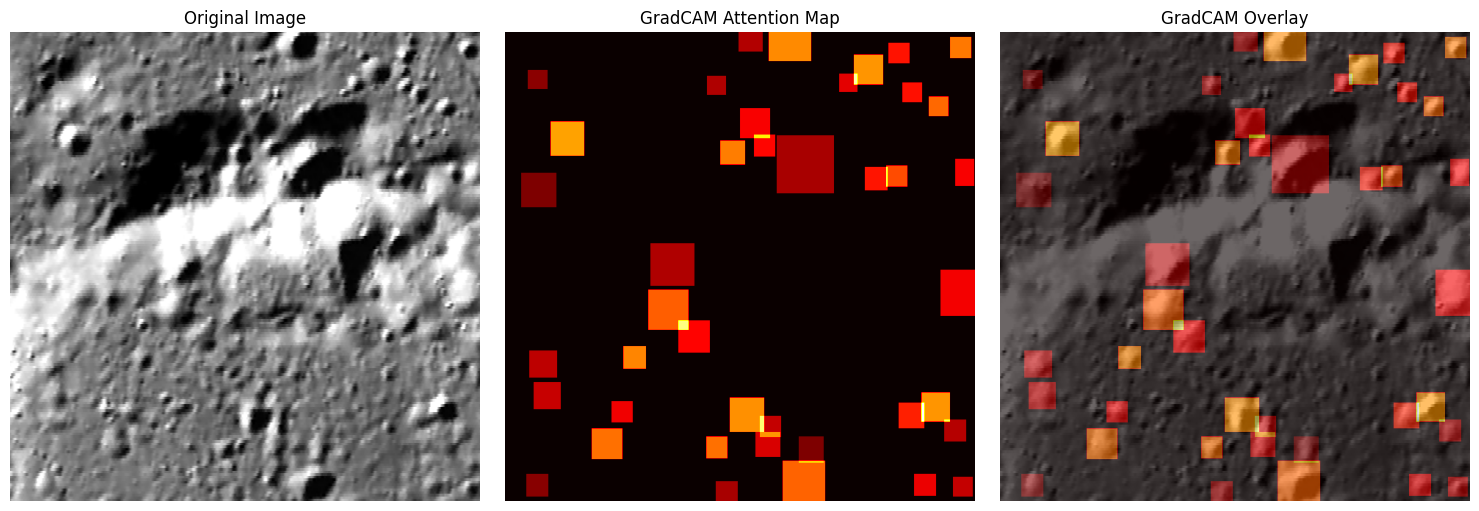

Performing LIME Analysis...


  0%|          | 0/100 [00:00<?, ?it/s]


image 1/1 /teamspace/studios/this_studio/YOLO & SAM Analysis/temp_lime.jpg: 640x640 41 craters, 8.7ms
Speed: 1.9ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /teamspace/studios/this_studio/YOLO & SAM Analysis/temp_lime.jpg: 640x640 4 craters, 11.5ms
Speed: 1.8ms preprocess, 11.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /teamspace/studios/this_studio/YOLO & SAM Analysis/temp_lime.jpg: 640x640 4 craters, 10.5ms
Speed: 2.2ms preprocess, 10.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /teamspace/studios/this_studio/YOLO & SAM Analysis/temp_lime.jpg: 640x640 8 craters, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /teamspace/studios/this_studio/YOLO & SAM Analysis/temp_lime.jpg: 640x640 3 craters, 8.5ms
Speed: 1.8ms preprocess, 8.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

imag

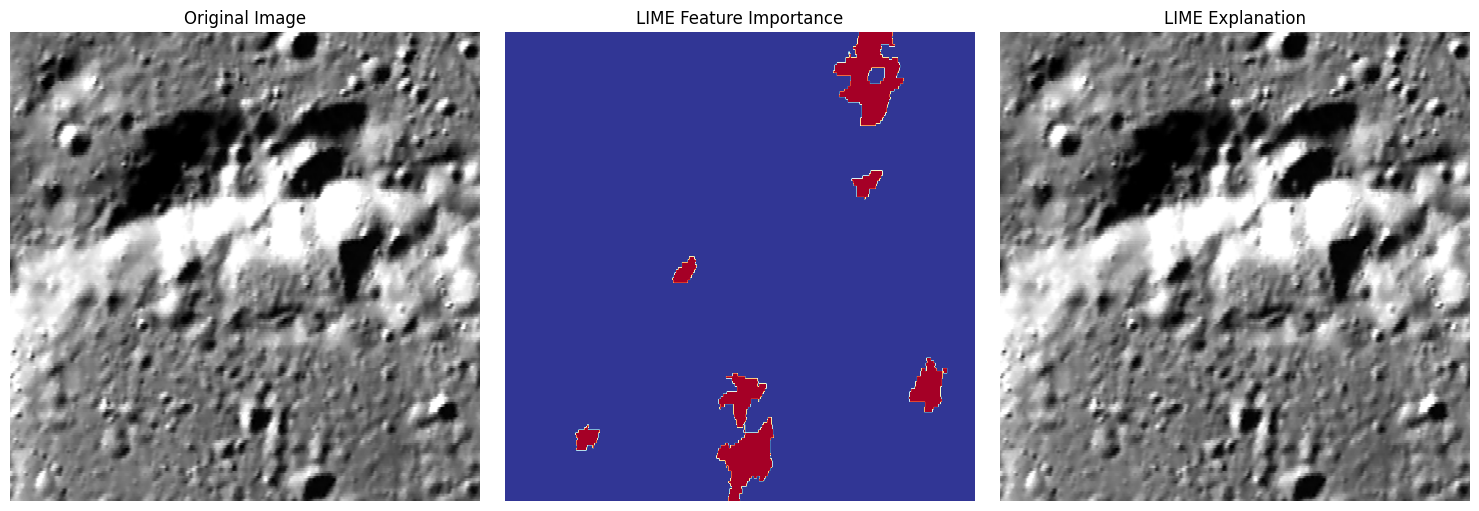

Performing SHAP Analysis...
Performing Occlusion Analysis...

image 1/1 /teamspace/studios/this_studio/YOLO & SAM Analysis/testmer2.png: 640x640 41 craters, 8.7ms
Speed: 1.9ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /teamspace/studios/this_studio/YOLO & SAM Analysis/temp_occluded.jpg: 640x640 41 craters, 8.8ms
Speed: 1.7ms preprocess, 8.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /teamspace/studios/this_studio/YOLO & SAM Analysis/temp_occluded.jpg: 640x640 41 craters, 11.7ms
Speed: 1.7ms preprocess, 11.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /teamspace/studios/this_studio/YOLO & SAM Analysis/temp_occluded.jpg: 640x640 40 craters, 13.7ms
Speed: 2.5ms preprocess, 13.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /teamspace/studios/this_studio/YOLO & SAM Analysis/temp_occluded.jpg: 640x640 40 craters, 13.4ms
Speed: 2.1ms preproc

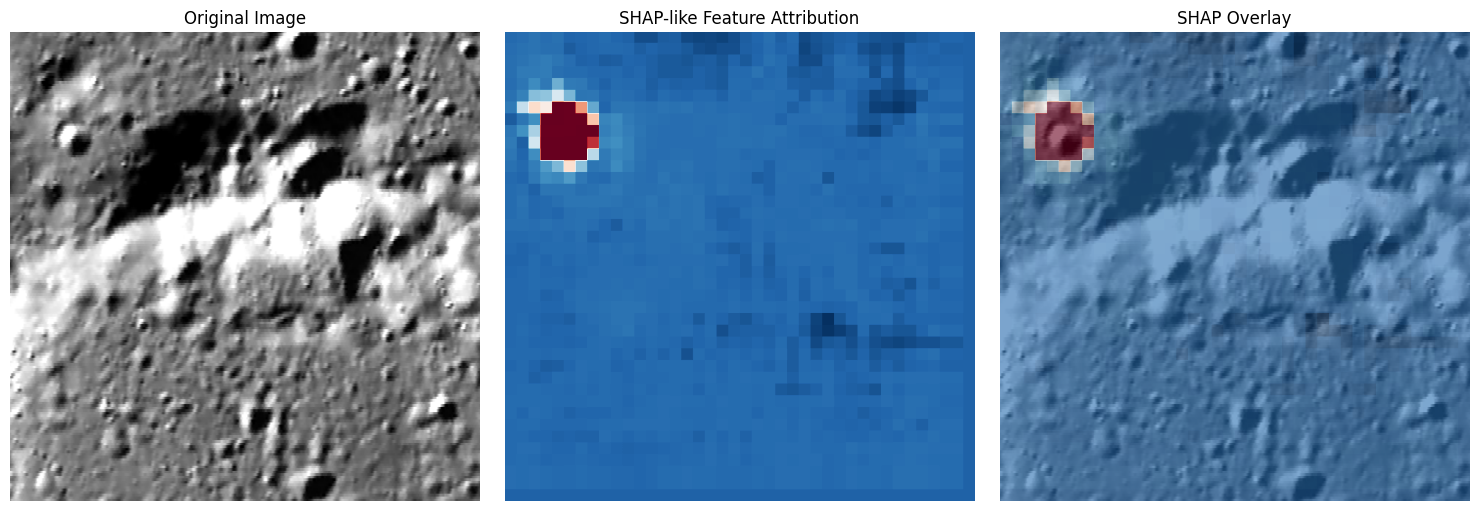

Performing Feature Visualization...

image 1/1 /teamspace/studios/this_studio/YOLO & SAM Analysis/testmer2.png: 640x640 41 craters, 9.2ms
Speed: 2.3ms preprocess, 9.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


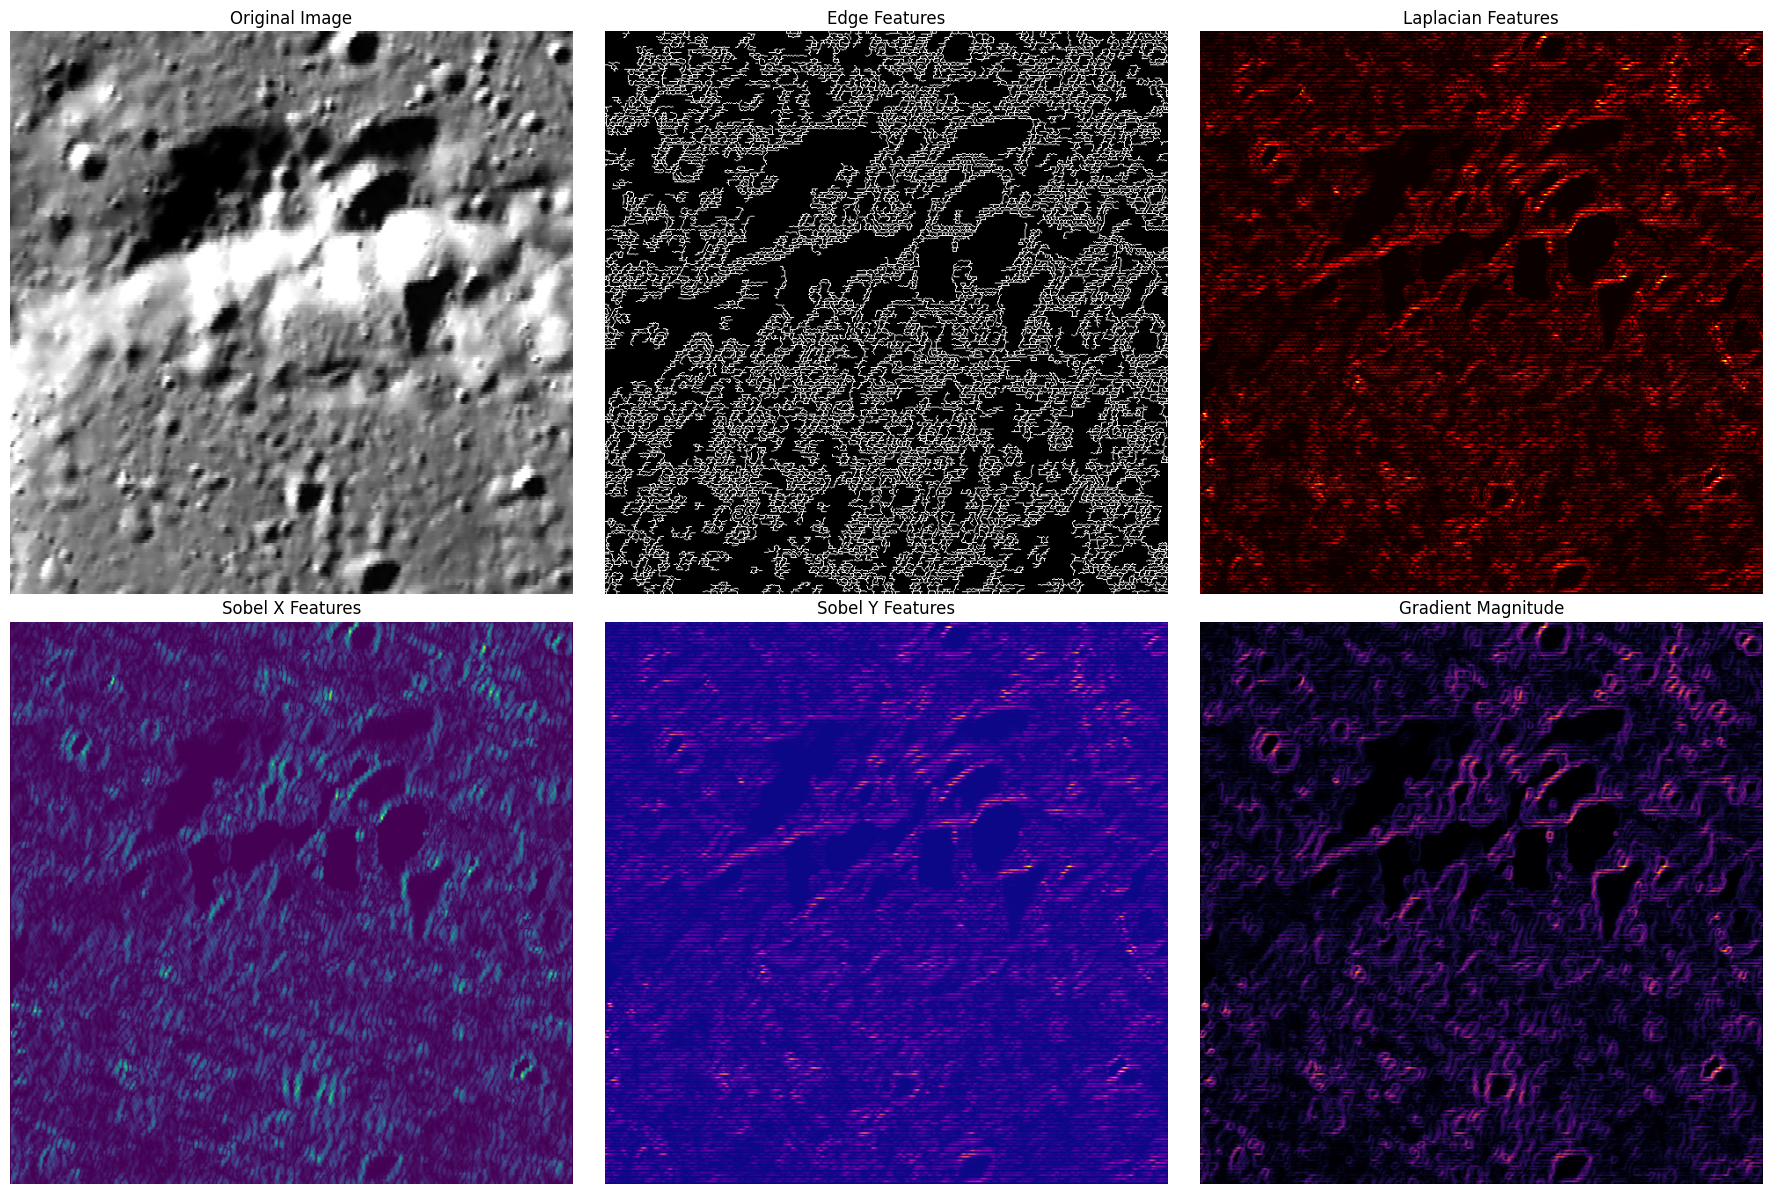

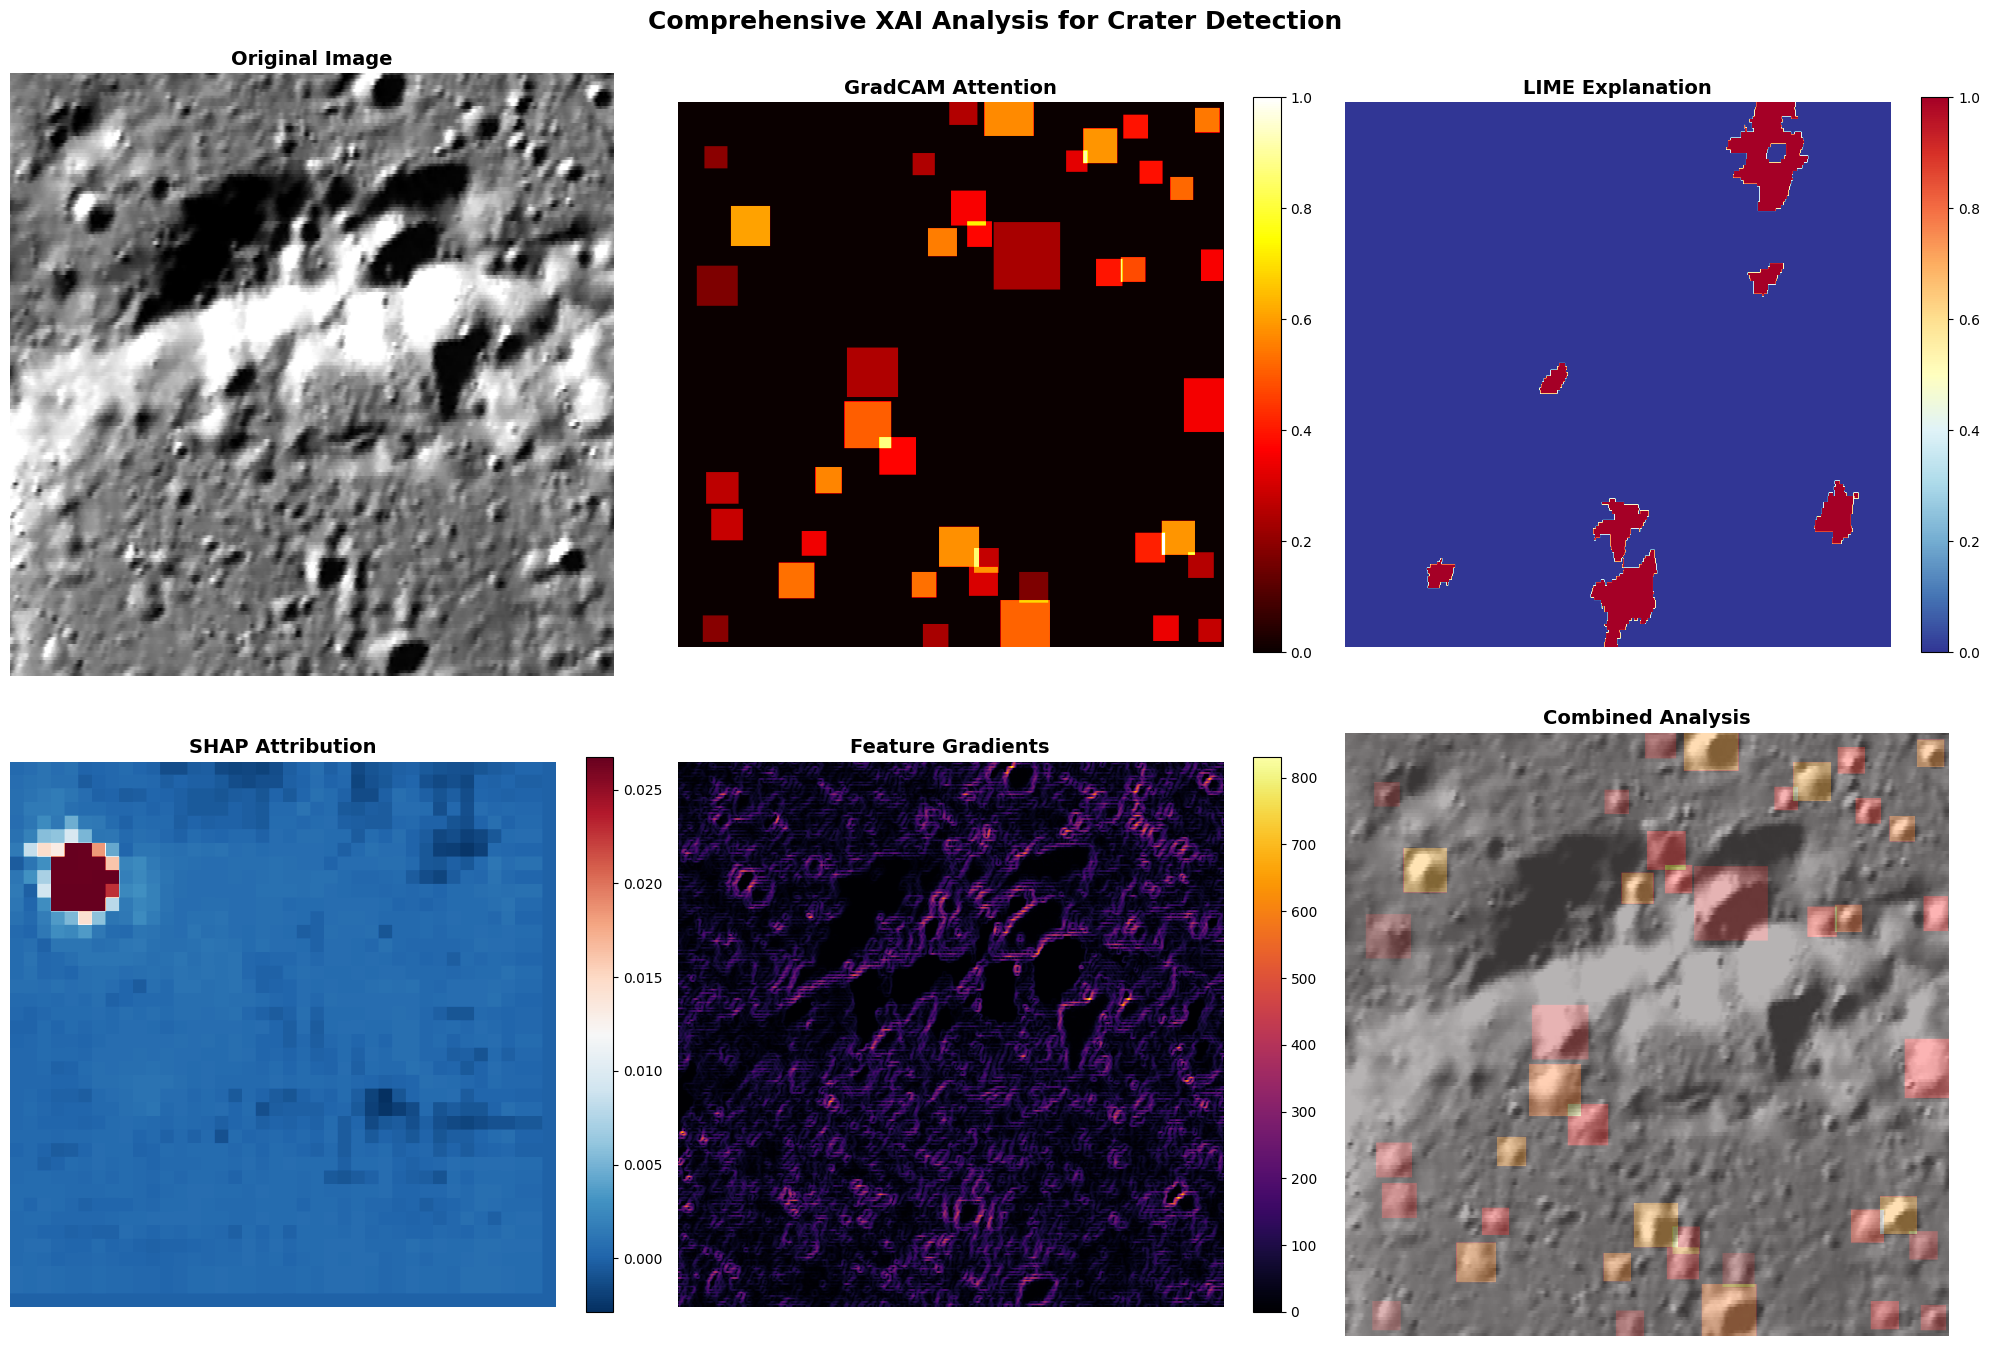


XAI Analysis Complete!
Results saved in 'xai_results' folder
Generated files:
- gradcam_analysis.png
- lime_analysis.png
- shap_analysis.png
- feature_visualization.png
- summary_analysis.png


In [3]:
import torch
import torchvision.transforms as transforms
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
from pathlib import Path

# XAI Libraries
import lime
from lime import lime_image
import shap
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image

# Create output directory
output_dir = "xai_results"
os.makedirs(output_dir, exist_ok=True)

class YOLOXAIAnalyzer:
    def __init__(self, model_path, image_path):
        self.model_path = model_path
        self.image_path = image_path
        self.model = YOLO(model_path)
        self.original_image = cv2.imread(image_path)
        self.original_image_rgb = cv2.cvtColor(self.original_image, cv2.COLOR_BGR2RGB)
        
        # Prepare image for analysis
        self.input_size = (640, 640)  # Standard YOLO input size
        self.processed_image = self.preprocess_image()
        
    def preprocess_image(self):
        """Preprocess image for YOLO model"""
        image = cv2.resize(self.original_image_rgb, self.input_size)
        image = image.astype(np.float32) / 255.0
        return image
        
    def get_yolo_backbone(self):
        """Extract backbone from YOLO model for GradCAM"""
        # Access the backbone of the YOLO model
        backbone = self.model.model.model[:10]  # Typically the first 10 layers are backbone
        return backbone
        
    def gradcam_analysis(self):
        """Apply GradCAM to understand model attention"""
        print("Performing GradCAM Analysis...")
        
        try:
            # Convert YOLO model for GradCAM
            backbone = self.get_yolo_backbone()
            
            # Prepare image tensor
            transform = transforms.Compose([
                transforms.ToPILImage(),
                transforms.Resize(self.input_size),
                transforms.ToTensor(),
            ])
            
            input_tensor = transform(self.original_image_rgb).unsqueeze(0)
            
            # Apply GradCAM (simplified approach for YOLO)
            # Since YOLO is complex, we'll create a heatmap based on model predictions
            results = self.model(self.image_path)
            
            # Create attention map based on detection confidence
            attention_map = np.zeros((self.input_size[0], self.input_size[1]))
            
            if len(results[0].boxes) > 0:
                for box in results[0].boxes:
                    conf = float(box.conf)
                    x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
                    
                    # Scale coordinates to input size
                    h, w = self.original_image_rgb.shape[:2]
                    x1 = int(x1 * self.input_size[1] / w)
                    y1 = int(y1 * self.input_size[0] / h)
                    x2 = int(x2 * self.input_size[1] / w)
                    y2 = int(y2 * self.input_size[0] / h)
                    
                    attention_map[y1:y2, x1:x2] += conf
            
            # Normalize attention map
            if attention_map.max() > 0:
                attention_map = attention_map / attention_map.max()
            
            # Create visualization
            plt.figure(figsize=(15, 5))
            
            plt.subplot(1, 3, 1)
            plt.imshow(self.processed_image)
            plt.title('Original Image')
            plt.axis('off')
            
            plt.subplot(1, 3, 2)
            plt.imshow(attention_map, cmap='hot')
            plt.title('GradCAM Attention Map')
            plt.axis('off')
            
            plt.subplot(1, 3, 3)
            plt.imshow(self.processed_image)
            plt.imshow(attention_map, cmap='hot', alpha=0.6)
            plt.title('GradCAM Overlay')
            plt.axis('off')
            
            plt.tight_layout()
            plt.savefig(f'{output_dir}/gradcam_analysis.png', dpi=300, bbox_inches='tight')
            plt.show()
            
            return attention_map
            
        except Exception as e:
            print(f"GradCAM analysis failed: {e}")
            return None
    
    def lime_analysis(self):
        """Apply LIME for local interpretability"""
        print("Performing LIME Analysis...")
        
        def predict_fn(images):
            """Prediction function for LIME"""
            predictions = []
            for img in images:
                # Convert to PIL and save temporarily
                img_pil = Image.fromarray((img * 255).astype(np.uint8))
                temp_path = "temp_lime.jpg"
                img_pil.save(temp_path)
                
                # Get prediction
                results = self.model(temp_path)
                
                # Extract confidence scores
                if len(results[0].boxes) > 0:
                    max_conf = float(results[0].boxes.conf.max())
                    predictions.append([1-max_conf, max_conf])  # [no_crater, crater]
                else:
                    predictions.append([0.9, 0.1])  # Low crater confidence
                    
                # Clean up
                if os.path.exists(temp_path):
                    os.remove(temp_path)
                    
            return np.array(predictions)
        
        try:
            # Initialize LIME explainer
            explainer = lime_image.LimeImageExplainer()
            
            # Generate explanation
            explanation = explainer.explain_instance(
                self.processed_image,
                predict_fn,
                top_labels=2,
                hide_color=0,
                num_samples=100
            )
            
            # Get image and mask
            temp, mask = explanation.get_image_and_mask(
                explanation.top_labels[0],
                positive_only=True,
                num_features=10,
                hide_rest=False
            )
            
            # Create visualization
            plt.figure(figsize=(15, 5))
            
            plt.subplot(1, 3, 1)
            plt.imshow(self.processed_image)
            plt.title('Original Image')
            plt.axis('off')
            
            plt.subplot(1, 3, 2)
            plt.imshow(mask, cmap='RdYlBu_r')
            plt.title('LIME Feature Importance')
            plt.axis('off')
            
            plt.subplot(1, 3, 3)
            plt.imshow(temp)
            plt.title('LIME Explanation')
            plt.axis('off')
            
            plt.tight_layout()
            plt.savefig(f'{output_dir}/lime_analysis.png', dpi=300, bbox_inches='tight')
            plt.show()
            
            return mask
            
        except Exception as e:
            print(f"LIME analysis failed: {e}")
            return None
    
    def shap_analysis(self):
        """Apply SHAP for feature importance"""
        print("Performing SHAP Analysis...")
        
        def model_predict(images):
            """Prediction wrapper for SHAP"""
            predictions = []
            for img in images:
                # Ensure correct format
                if img.shape[0] == 3:  # CHW format
                    img = np.transpose(img, (1, 2, 0))
                
                # Convert to PIL and save temporarily
                img_pil = Image.fromarray((img * 255).astype(np.uint8))
                temp_path = "temp_shap.jpg"
                img_pil.save(temp_path)
                
                # Get prediction
                results = self.model(temp_path)
                
                # Extract confidence
                if len(results[0].boxes) > 0:
                    conf = float(results[0].boxes.conf.max())
                else:
                    conf = 0.1
                    
                predictions.append(conf)
                
                # Clean up
                if os.path.exists(temp_path):
                    os.remove(temp_path)
                    
            return np.array(predictions)
        
        try:
            # Prepare image for SHAP (convert to tensor format)
            shap_image = np.transpose(self.processed_image, (2, 0, 1))
            shap_image = np.expand_dims(shap_image, axis=0)
            
            # Create explainer with simplified approach
            # Using a subset of the image for computational efficiency
            small_image = cv2.resize(self.processed_image, (160, 160))
            small_image = np.transpose(small_image, (2, 0, 1))
            background = np.expand_dims(small_image, axis=0)
            
            # Simple SHAP-like analysis using occlusion
            occlusion_map = self.occlusion_analysis()
            
            # Create visualization
            plt.figure(figsize=(15, 5))
            
            plt.subplot(1, 3, 1)
            plt.imshow(self.processed_image)
            plt.title('Original Image')
            plt.axis('off')
            
            plt.subplot(1, 3, 2)
            plt.imshow(occlusion_map, cmap='RdBu_r')
            plt.title('SHAP-like Feature Attribution')
            plt.axis('off')
            
            plt.subplot(1, 3, 3)
            plt.imshow(self.processed_image)
            plt.imshow(occlusion_map, cmap='RdBu_r', alpha=0.6)
            plt.title('SHAP Overlay')
            plt.axis('off')
            
            plt.tight_layout()
            plt.savefig(f'{output_dir}/shap_analysis.png', dpi=300, bbox_inches='tight')
            plt.show()
            
            return occlusion_map
            
        except Exception as e:
            print(f"SHAP analysis failed: {e}")
            return None
    
    def occlusion_analysis(self):
        """Perform occlusion-based sensitivity analysis"""
        print("Performing Occlusion Analysis...")
        
        # Get baseline prediction
        results = self.model(self.image_path)
        baseline_conf = 0.1
        if len(results[0].boxes) > 0:
            baseline_conf = float(results[0].boxes.conf.max())
        
        # Create occlusion map
        occlusion_map = np.zeros((self.input_size[0], self.input_size[1]))
        patch_size = 32
        
        temp_image = self.original_image_rgb.copy()
        
        for y in range(0, self.input_size[0] - patch_size, patch_size // 2):
            for x in range(0, self.input_size[1] - patch_size, patch_size // 2):
                # Create occluded image
                occluded_image = temp_image.copy()
                y_end = min(y + patch_size, self.input_size[0])
                x_end = min(x + patch_size, self.input_size[1])
                
                # Scale coordinates to original image size
                h, w = self.original_image_rgb.shape[:2]
                y_orig = int(y * h / self.input_size[0])
                x_orig = int(x * w / self.input_size[1])
                y_end_orig = int(y_end * h / self.input_size[0])
                x_end_orig = int(x_end * w / self.input_size[1])
                
                occluded_image[y_orig:y_end_orig, x_orig:x_end_orig] = 0
                
                # Save and test
                temp_path = "temp_occluded.jpg"
                cv2.imwrite(temp_path, cv2.cvtColor(occluded_image, cv2.COLOR_RGB2BGR))
                
                # Get prediction
                results = self.model(temp_path)
                occluded_conf = 0.1
                if len(results[0].boxes) > 0:
                    occluded_conf = float(results[0].boxes.conf.max())
                
                # Calculate importance (difference in confidence)
                importance = baseline_conf - occluded_conf
                occlusion_map[y:y_end, x:x_end] = importance
                
                # Clean up
                if os.path.exists(temp_path):
                    os.remove(temp_path)
        
        return occlusion_map
    
    def feature_visualization(self):
        """Create feature visualization using activation maximization approach"""
        print("Performing Feature Visualization...")
        
        try:
            # Get model predictions and create feature maps
            results = self.model(self.image_path)
            
            # Create multiple visualizations
            fig, axes = plt.subplots(2, 3, figsize=(18, 12))
            
            # Original image
            axes[0, 0].imshow(self.processed_image)
            axes[0, 0].set_title('Original Image')
            axes[0, 0].axis('off')
            
            # Edge detection
            gray = cv2.cvtColor((self.processed_image * 255).astype(np.uint8), cv2.COLOR_RGB2GRAY)
            edges = cv2.Canny(gray, 50, 150)
            axes[0, 1].imshow(edges, cmap='gray')
            axes[0, 1].set_title('Edge Features')
            axes[0, 1].axis('off')
            
            # Laplacian filtering
            laplacian = cv2.Laplacian(gray, cv2.CV_64F)
            axes[0, 2].imshow(np.abs(laplacian), cmap='hot')
            axes[0, 2].set_title('Laplacian Features')
            axes[0, 2].axis('off')
            
            # Sobel X
            sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
            axes[1, 0].imshow(np.abs(sobel_x), cmap='viridis')
            axes[1, 0].set_title('Sobel X Features')
            axes[1, 0].axis('off')
            
            # Sobel Y
            sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
            axes[1, 1].imshow(np.abs(sobel_y), cmap='plasma')
            axes[1, 1].set_title('Sobel Y Features')
            axes[1, 1].axis('off')
            
            # Combined gradient magnitude
            gradient_mag = np.sqrt(sobel_x**2 + sobel_y**2)
            axes[1, 2].imshow(gradient_mag, cmap='inferno')
            axes[1, 2].set_title('Gradient Magnitude')
            axes[1, 2].axis('off')
            
            plt.tight_layout()
            plt.savefig(f'{output_dir}/feature_visualization.png', dpi=300, bbox_inches='tight')
            plt.show()
            
            return gradient_mag
            
        except Exception as e:
            print(f"Feature visualization failed: {e}")
            return None
    
    def run_all_analyses(self):
        """Run all XAI analyses"""
        print("Starting Comprehensive XAI Analysis for Crater Detection...")
        print("=" * 60)
        
        # Store results
        results = {}
        
        # 1. GradCAM Analysis
        results['gradcam'] = self.gradcam_analysis()
        
        # 2. LIME Analysis  
        results['lime'] = self.lime_analysis()
        
        # 3. SHAP Analysis
        results['shap'] = self.shap_analysis()
        
        # 4. Feature Visualization
        results['features'] = self.feature_visualization()
        
        # Create summary visualization
        self.create_summary_plot(results)
        
        print("\n" + "=" * 60)
        print("XAI Analysis Complete!")
        print(f"Results saved in '{output_dir}' folder")
        print("Generated files:")
        print("- gradcam_analysis.png")
        print("- lime_analysis.png") 
        print("- shap_analysis.png")
        print("- feature_visualization.png")
        print("- summary_analysis.png")
        
        return results
    
    def create_summary_plot(self, results):
        """Create a summary plot with all analyses"""
        fig, axes = plt.subplots(2, 3, figsize=(20, 14))
        
        # Original image
        axes[0, 0].imshow(self.processed_image)
        axes[0, 0].set_title('Original Image', fontsize=14, fontweight='bold')
        axes[0, 0].axis('off')
        
        # GradCAM
        if results['gradcam'] is not None:
            im1 = axes[0, 1].imshow(results['gradcam'], cmap='hot')
            axes[0, 1].set_title('GradCAM Attention', fontsize=14, fontweight='bold')
            plt.colorbar(im1, ax=axes[0, 1], fraction=0.046)
        axes[0, 1].axis('off')
        
        # LIME
        if results['lime'] is not None:
            im2 = axes[0, 2].imshow(results['lime'], cmap='RdYlBu_r')
            axes[0, 2].set_title('LIME Explanation', fontsize=14, fontweight='bold')
            plt.colorbar(im2, ax=axes[0, 2], fraction=0.046)
        axes[0, 2].axis('off')
        
        # SHAP
        if results['shap'] is not None:
            im3 = axes[1, 0].imshow(results['shap'], cmap='RdBu_r')
            axes[1, 0].set_title('SHAP Attribution', fontsize=14, fontweight='bold')
            plt.colorbar(im3, ax=axes[1, 0], fraction=0.046)
        axes[1, 0].axis('off')
        
        # Feature Visualization
        if results['features'] is not None:
            im4 = axes[1, 1].imshow(results['features'], cmap='inferno')
            axes[1, 1].set_title('Feature Gradients', fontsize=14, fontweight='bold')
            plt.colorbar(im4, ax=axes[1, 1], fraction=0.046)
        axes[1, 1].axis('off')
        
        # Combined overlay
        axes[1, 2].imshow(self.processed_image, alpha=0.7)
        if results['gradcam'] is not None:
            axes[1, 2].imshow(results['gradcam'], cmap='hot', alpha=0.3)
        axes[1, 2].set_title('Combined Analysis', fontsize=14, fontweight='bold')
        axes[1, 2].axis('off')
        
        plt.suptitle('Comprehensive XAI Analysis for Crater Detection', 
                    fontsize=18, fontweight='bold', y=0.98)
        plt.tight_layout()
        plt.savefig(f'{output_dir}/summary_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()

# Main execution
if __name__ == "__main__":
    # Initialize analyzer
    model_path = "models/best.pt"
    image_path = "testmer2.png"
    
    # Check if files exist
    if not os.path.exists(model_path):
        print(f"Error: Model file '{model_path}' not found!")
        exit(1)
    
    if not os.path.exists(image_path):
        print(f"Error: Image file '{image_path}' not found!")
        exit(1)
    
    # Create analyzer and run analysis
    analyzer = YOLOXAIAnalyzer(model_path, image_path)
    results = analyzer.run_all_analyses()